# Paso 1
Cargar y limpiar los datasets.

In [52]:
import pandas as pd # type: ignore
import numpy as np # type: ignore

# Leemos dataframe para entrenamiento y para test (t)

dataframe = pd.read_csv("../files/input/train_data.csv.zip",index_col=False, compression="zip")
dataframet = pd.read_csv("../files/input/test_data.csv.zip",index_col=False, compression="zip")

data = pd.concat([dataframe,dataframet])

data.head()
#data["default payment next month"].value_counts()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,10748,310000,1,3,1,32,0,0,0,0,...,84373,57779,14163,8295,6000,4000,3000,1000,2000,0
1,12574,10000,2,3,1,49,-1,-1,-2,-1,...,1690,1138,930,0,0,2828,0,182,0,1
2,29677,50000,1,2,1,28,-1,-1,-1,0,...,45975,1300,43987,0,46257,2200,1300,43987,1386,0
3,8857,80000,2,3,1,52,2,2,3,3,...,40748,39816,40607,3700,1600,1600,0,1600,1600,1
4,21099,270000,1,1,2,34,1,2,0,0,...,22448,15490,17343,0,4000,2000,0,2000,2000,0


In [53]:
data = data[data["EDUCATION"] != 0]
data = data[data["MARRIAGE"] != 0]
data["PAY_0"] = data["PAY_0"].abs()
data["PAY_2"] = data["PAY_2"].abs()
data["PAY_3"] = data["PAY_3"].abs()
data["PAY_4"] = data["PAY_4"].abs()
data["PAY_5"] = data["PAY_5"].abs()
data["PAY_6"] = data["PAY_6"].abs()

In [54]:
data["PAY_AMT1"].value_counts()
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000,...,29932.000000,29932.00000,29932.000000,29932.000000,2.993200e+04,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000
mean,14998.159428,167523.375651,1.603568,1.852399,1.554590,35.479721,0.729821,0.773420,0.773553,0.737472,...,43320.699452,40367.54861,38927.267072,5659.603034,5.923502e+03,5226.158760,4830.180075,4805.269310,5221.906421,0.221535
std,8660.079085,129821.209970,0.489164,0.788941,0.518277,9.219044,0.854252,0.923222,0.927587,0.933151,...,64385.857098,60845.48775,59601.231051,16555.874642,2.306020e+04,17620.773728,15680.849676,15294.066811,17795.285035,0.415287
min,1.000000,10000.000000,1.000000,1.000000,1.000000,21.000000,0.000000,0.000000,0.000000,0.000000,...,-170000.000000,-81334.00000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7498.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,...,2339.750000,1772.75000,1261.000000,1000.000000,8.360000e+02,390.000000,298.000000,255.000000,122.000000,0.000000
50%,14994.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,1.000000,0.000000,0.000000,0.000000,...,19068.500000,18125.50000,17111.500000,2100.000000,2.010000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22495.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,1.000000,2.000000,2.000000,2.000000,...,54613.250000,50253.50000,49260.250000,5006.000000,5.000000e+03,4507.250000,4015.000000,4040.250000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.00000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [55]:
# Quitamos el ID y renombramos la columna default (target)

data.pop('ID')
data.rename(columns={'default payment next month':'default'}, inplace=True)
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,310000,1,3,1,32,0,0,0,0,0,...,84373,57779,14163,8295,6000,4000,3000,1000,2000,0
1,10000,2,3,1,49,1,1,2,1,2,...,1690,1138,930,0,0,2828,0,182,0,1
2,50000,1,2,1,28,1,1,1,0,1,...,45975,1300,43987,0,46257,2200,1300,43987,1386,0
3,80000,2,3,1,52,2,2,3,3,3,...,40748,39816,40607,3700,1600,1600,0,1600,1600,1
4,270000,1,1,2,34,1,2,0,0,2,...,22448,15490,17343,0,4000,2000,0,2000,2000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,20000,1,2,1,44,2,2,2,2,2,...,2882,9235,1719,2890,2720,2890,9263,1824,1701,0
8996,360000,1,1,2,35,1,1,2,2,2,...,0,0,0,0,0,0,0,0,0,0
8997,150000,1,1,2,35,1,1,1,1,1,...,780,0,0,9054,0,783,0,0,0,0
8998,30000,1,2,2,37,4,3,2,1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


In [56]:
# Agrupamos todos los mayores de 4 en 4 (Others)

def normalizeEdu(x):
    if x < 5:
        return x
    else:
        return 4

data["EDUCATION"] = data["EDUCATION"].apply(lambda x: normalizeEdu(x))

<Axes: xlabel='default', ylabel='count'>

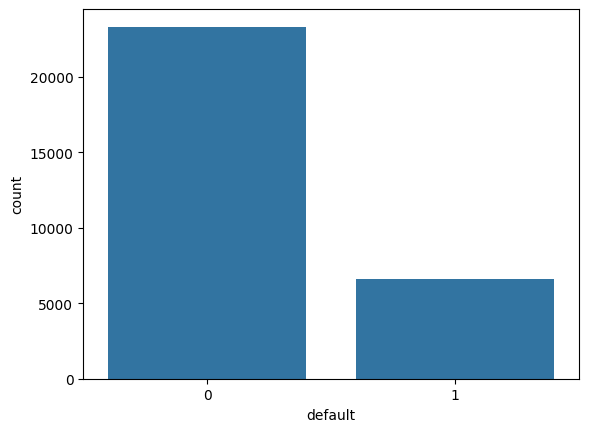

In [57]:
import seaborn as sns

sns.countplot(x="default",data = data)

In [58]:
# Verificamos que no hay valores nulos

np.unique(data.isnull().values)

array([False])

# Paso 2
División de datasets para entrenamiento y prueba.

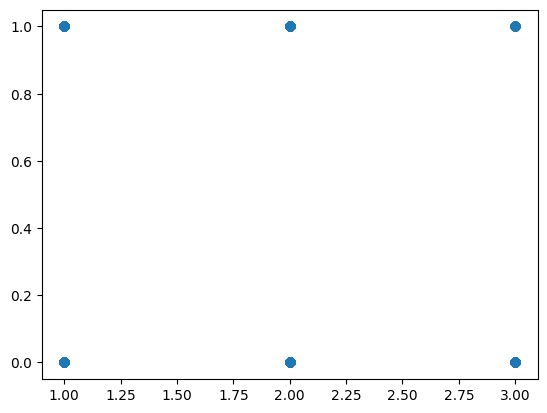

In [59]:
from matplotlib import pyplot as plt # type: ignore

plt.scatter(data["MARRIAGE"],data["default"])

In [60]:
# División de features y target

from sklearn.model_selection import train_test_split

X = data.iloc[:,:-1]
y = data["default"]
X.shape

(29932, 23)

In [61]:
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter

X_resampled, y_resampled = SMOTE().fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

[(0, 23301), (1, 23301)]


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,train_size=0.9, random_state=42)

y_train.head()

26706    1
22853    0
1786     0
10963    1
45533    1
Name: default, dtype: int64

# Paso 3
Creación del pipeline.

In [63]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler # type: ignore
from sklearn.compose import ColumnTransformer # type: ignore
from sklearn.pipeline import Pipeline # type: ignore
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif # type: ignore
from sklearn.linear_model import LogisticRegression

# Step 3: Create a Pipeline for the Classification Model
# ------------------------------------------------------

# Define categorical and numerical features
categorical_features = [
    'SEX',
    'EDUCATION',
    'MARRIAGE',
    'PAY_0',
    'PAY_2',
    'PAY_3',
    'PAY_4',
    'PAY_5',
    'PAY_6'
]

numeric_features = [col for col in X_train.columns if col not in categorical_features]

# Preprocessing for categorical data: One-Hot Encoding
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Preprocessing for numerical data: Scaling to [0, 1]
numeric_transformer = MinMaxScaler()

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features),
    ]
)

# Create the pipeline with preprocessing, feature selection, and classifier
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(score_func=chi2)),
        ('classifier', LogisticRegression(tol=1e-6,max_iter=10000))
    ]
)

# Paso 4
Ajuste de hiperparámetros.

In [64]:
from sklearn.model_selection import GridSearchCV # type: ignore

# Step 4: Optimize Hyperparameters Using Cross-Validation
# -------------------------------------------------------

# Define the hyperparameter grid
param_grid = {
    'feature_selection__k': ['all'],
    'classifier__C': [120],
    'classifier__penalty': ['l1'],#,'l2','elasticnet'],
    'classifier__solver': ['saga'],
    #'classifier__l1_ratio': [0.3,0.4,0.5,0.6,0.7],  # Only used if penalty is 'elasticnet'
    'classifier__class_weight': [None]#{1:0.55, 0:0.45},{1:0.6,0:0.4},{1:0.7,0:0.3}],
}

# Set up GridSearchCV with 10-fold cross-validation
grid_search = GridSearchCV(
    pipeline, param_grid, cv=5, scoring='balanced_accuracy', n_jobs=-1
)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

/home/dagallegore/Documentos/Universidad/Analítica Predictiva/20204-2-LAB-02-prediccion-del-default-usando-logreg-dagallegore/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dagallegore/Documentos/Universidad/Analítica Predictiva/20204-2-LAB-02-prediccion-del-default-usando-logreg-dagallegore/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dagallegore/Documentos/Universidad/Analítica Predictiva/20204-2-LAB-02-prediccion-del-default-usando-logreg-dagallegore/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dagallegore/Documentos/Universidad/Analítica Predictiva/20204-2-LAB-02-prediccion-del-default-usando-logre

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['SEX',
                                                                          'EDUCATION',
                                                                          'MARRIAGE',
                                                                          'PAY_0',
                                                                          'PAY_2',
                                                                          'PAY_3',
                                                                          'PAY_4',
                                                                          'PAY_5',
                                                                          'PAY_6']),
                                                                        ('num',
                                                                         MinMaxScaler(),
                                                                         ['LIMIT_BAL',
                                                                          'AGE',
                                                                          'BILL_AMT1',
                                                                          'BILL_AMT2',
                                                                          'BILL_AMT3',
                                                                          'BILL_AMT4',
                                                                          'BILL_AMT5',
                                                                          'BILL_AMT6',
                                                                          'PAY_AMT1',
                                                                          'PAY_AMT...
                                                                          'PAY_AMT6'])])),
                                       ('feature_selection',
                                        SelectKBest(score_func=<function chi2 at 0x704f567dde40>)),
                                       ('classifier',
                                        LogisticRegression(max_iter=10000,
                                                           tol=1e-06))]),
             n_jobs=-1,
             param_grid={'classifier__C': [120],
                         'classifier__class_weight': [None],
                         'classifier__penalty': ['l1'],
                         'classifier__solver': ['saga'],
                         'feature_selection__k': ['all']},
             scoring='balanced_accuracy')

In [65]:
from sklearn.metrics import balanced_accuracy_score

# Obtener el mejor modelo
best_model = grid_search   #.best_estimator_

# Evaluar en el conjunto de prueba
y_pred = best_model.predict(X_test)
test_score = balanced_accuracy_score(y_test, y_pred)
str(type(best_model))

"<class 'sklearn.model_selection._search.GridSearchCV'>"

In [66]:
best_model.best_params_

{'classifier__C': 120,
 'classifier__class_weight': None,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga',
 'feature_selection__k': 'all'}

In [67]:
best_model.score(X_test,y_test)

np.float64(0.7168387617991908)

# Paso 5
Guardar el modelo.

In [68]:
import os
import pickle
import gzip

# Crear las carpetas necesarias si no existen
os.makedirs('../files/models', exist_ok=True)

# Ruta del archivo donde se guardará el modelo
model_path = '../files/models/model.pkl.gz'

# Guardar el modelo usando pickle
with gzip.open(model_path, 'wb') as file:
    pickle.dump(best_model, file)

os.path.getsize(model_path)

4719

# Paso 6
Cálculo de métricas y guardado JSON.

In [69]:
from sklearn.metrics import (
    precision_score,
    balanced_accuracy_score,
    recall_score,
    f1_score
)
import json


# Hacer predicciones en los conjuntos de entrenamiento y prueba
# Predecir en el conjunto de entrenamiento
y_train_pred = best_model.predict(X_train)

# Predecir en el conjunto de prueba
y_test_pred = best_model.predict(X_test)

# Calcular las métricas para cada conjunto
def round_float(value):
    return round(value, 3)

metrics_train = {
    'type': 'metrics',
    'dataset': 'train',
    'precision': precision_score(y_train, y_train_pred, average='binary'),
    'balanced_accuracy': balanced_accuracy_score(y_train, y_train_pred),
    'recall': recall_score(y_train, y_train_pred, average='binary'),
    'f1_score': f1_score(y_train, y_train_pred, average='binary')
}

metrics_test = {
    'type': 'metrics',
    'dataset': 'test',
    'precision': precision_score(y_test, y_test_pred, average='binary'),
    'balanced_accuracy': balanced_accuracy_score(y_test, y_test_pred),
    'recall': recall_score(y_test, y_test_pred, average='binary'),
    'f1_score': f1_score(y_test, y_test_pred, average='binary')
}

# Guardar las métricas en 'files/output/metrics.json'
# Crear el directorio si no existe
os.makedirs('../files/output', exist_ok=True)

metrics_path = '../files/output/metrics.json'

# Escribir las métricas en el archivo
with open(metrics_path, 'w') as f:
    json.dump([metrics_train], f)
    f.write('\n')
    json.dump([metrics_test], f)
    f.write('\n')

# Paso 7
Matrices de confusión.

In [70]:
from sklearn.metrics import confusion_matrix # type: ignore


# Calcular las matrices de confusión
def format_confusion_matrix(cm, dataset_type):
    cm_dict = {
        'type': 'cm_matrix',
        'dataset': dataset_type,
        'true_0': {
            'predicted_0': int(cm[0][0]) if cm[0][0] != 0 else None,
            'predicted_1': int(cm[0][1]) if cm[0][1] != 0 else None
        },
        'true_1': {
            'predicted_0': int(cm[1][0]) if cm[1][0] != 0 else None,
            'predicted_1': int(cm[1][1]) if cm[1][1] != 0 else None
        }
    }
    return cm_dict

cm_train = confusion_matrix(y_train, y_train_pred, labels=[0,1])
cm_test = confusion_matrix(y_test, y_test_pred, labels=[0,1])

cm_train_formatted = format_confusion_matrix(cm_train, 'train')
cm_test_formatted = format_confusion_matrix(cm_test, 'test')

# Crear la lista de métricas y matrices de confusión sin duplicados
metrics_data = [metrics_train, metrics_test, cm_train_formatted, cm_test_formatted]

# Guardar el contenido en 'metrics.json' sin caracteres de nueva línea
os.makedirs('../files/output', exist_ok=True)
metrics_path = '../files/output/metrics.json'

with open(metrics_path, 'w') as f:
    json.dump(metrics_train, f)
    f.write('\n')
    json.dump(metrics_test, f)
    f.write('\n')
    json.dump(cm_train_formatted, f, separators=(',', ':'), ensure_ascii=False)
    f.write("\n")
    json.dump(cm_test_formatted, f, separators=(',', ':'), ensure_ascii=False)